Zachary Goldstein & James Jameson - Project 1 - 67-364

Domain: Higher Education Data

Import libraries

In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from ggplot import *

Load in the dataset

The following file contains the most recent and important college scorecard data, compiled by the U.S. Department of Education

In [2]:
filename1 = 'Most-Recent-Cohorts-Scorecard-Elements.csv'
df = pd.read_csv(filename1)
df.head()

,﻿UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,0,3,...,NaN,0.8284,0.1049,30300,0.426,33888,347.789507913825,0.2370456303,NaN,0.32451962616822
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,0,3,...,NaN,0.5214,0.2422,39700,0.665,21941.5,225.183648722001,0.5006735519,NaN,0.54610480182926
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,...,NaN,0.7795,0.8540,40100,0.676,23370,239.844216240146,0.2904884319,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,...,NaN,0.4596,0.2640,45500,0.668,24097,247.305352106924,0.5278022948,NaN,0.47240649606299
4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,...,NaN,0.7554,0.1270,26600,0.36,33118.5,339.892198354698,0.1855174624,NaN,0.2574049608355


In [3]:
CMU = df[df['INSTNM']=="Carnegie Mellon University"]

List of CMU's peer institutions: https://www.cmu.edu/ira/infox/external/peer.html

In [4]:
peersString = """Carnegie Mellon University
California Institute of Technology
Cornell University
Duke University
Emory University
Georgia Institute of Technology-Main Campus
Massachusetts Institute of Technology
Northwestern University
Princeton University
Rensselaer Polytechnic Institute
Rice University
Stanford University
University of Pennsylvania
Washington University in St Louis"""

peers = peersString.splitlines()

# Cleaning Notes - changed from Georgia Institute of Technology, Washington University in St. Louis

Set the index of the dataframe to the name of the institution

In [5]:
df = df.set_index('INSTNM')

In [6]:
subjectCodes = {"Math & Stats":"PCIP27","Comp Sci and Info Sys":'PCIP11',"Engineering":"PCIP14","Social Sci":"PCIP45",
                "Phys Sci":"PCIP40","Arts":"PCIP50","Business":"PCIP52","Psych":"PCIP42","Architect":"PCIP04",
                "English":"PCIP23","Multi/Interdis":"PCIP30","Biology":"PCIP26","Phil":"PCIP38"} # "Hist":"PCIP54"

Note: I believe that data is just for undergraduates

Implications: If a student is considering attending a school, they might be interested to know whether their intended major is common or uncommon at the school.

A student might wish to go to a school where their major is popular, an indication that the department is strong and the department receives substantial support from the university

Alternatively, a student might wish to go to a school where their major is rare, so that they can receive more attention from faculty, have less competition for research opportunities and be more distinctive.

In [7]:
cmuMajors = {}
for subject in subjectCodes:
    cmuMajors[subject] = df.loc['Carnegie Mellon University',subjectCodes[subject]]

In [8]:
a = [cmuMajors[major] for major in cmuMajors]
a = sorted(a,reverse=True)
a = [1-sum(a)]+ a # add in the "other" value at the beginning
a

[0.038999999999999924,
 0.25679999999999997,
 0.12300000000000001,
 0.1061,
 0.094600000000000004,
 0.074300000000000005,
 0.074300000000000005,
 0.062199999999999998,
 0.050000000000000003,
 0.036499999999999998,
 0.029100000000000001,
 0.025700000000000001,
 0.023,
 0.0054000000000000003]

In [9]:
labels = []
for prop in a:
    for major in cmuMajors:
        if cmuMajors[major] == prop and major not in labels:
            labels.append(major)
            break
labels = ["Other"] + labels
labels

['Other',
 'Engineering',
 'Comp Sci and Info Sys',
 'Arts',
 'Multi/Interdis',
 'Phys Sci',
 'Business',
 'Math & Stats',
 'Social Sci',
 'Architect',
 'Psych',
 'Biology',
 'English',
 'Phil']

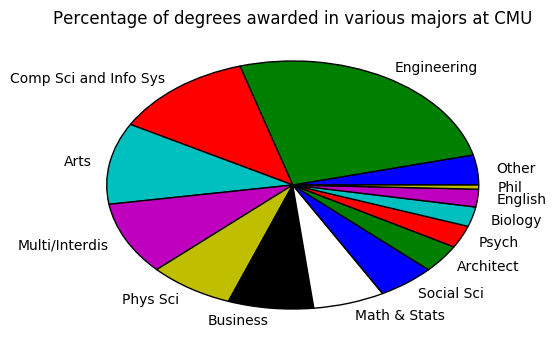

In [10]:
plt.pie(a,labels = labels)
plt.title("Percentage of degrees awarded in various majors at CMU")
plt.show()

In [11]:
def subjectPopularity(schools,subject,subjectCodes):
    dict1 = {}
    for school in schools:
        dict1[school]=df.loc[school,subjectCodes[subject]]
    ser = pd.Series(dict1)
    ser = ser.sort_values(ascending=True)
    plt.style.use('ggplot')
    ser.plot(kind='barh',color='blue')
    plt.title('CMU & Peers by Percent of Degrees Awarded in ' + subject)
    
    return plt.show()

Below code block expands output space

In [12]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

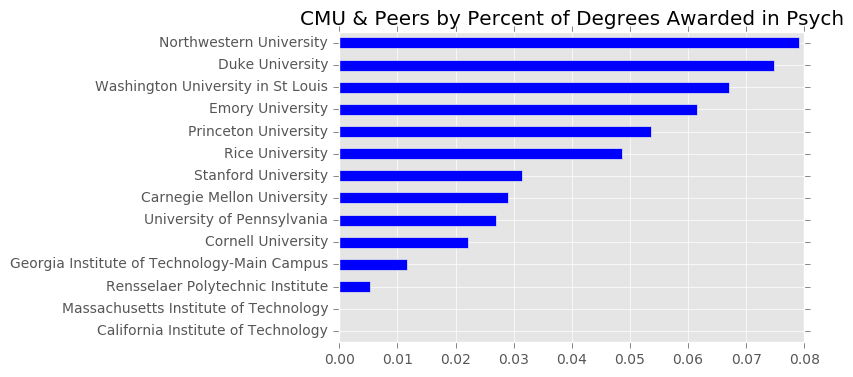

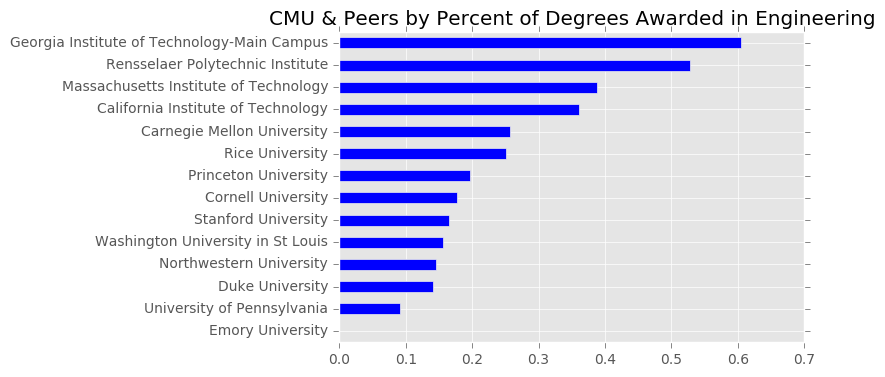

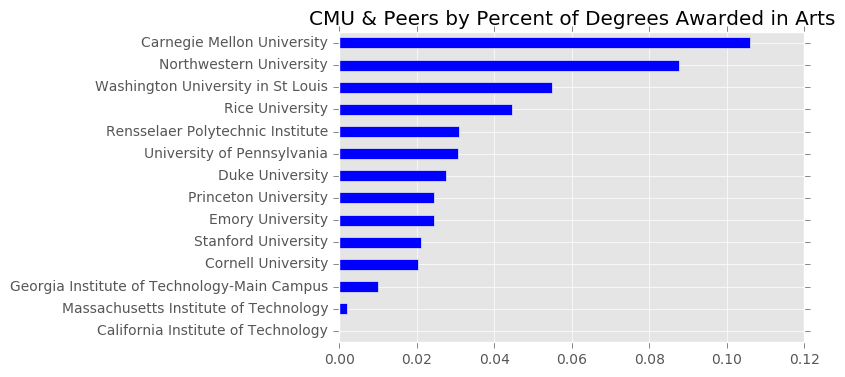

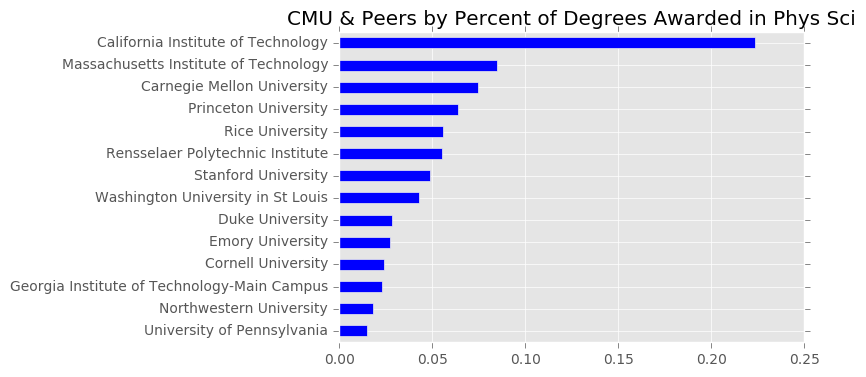

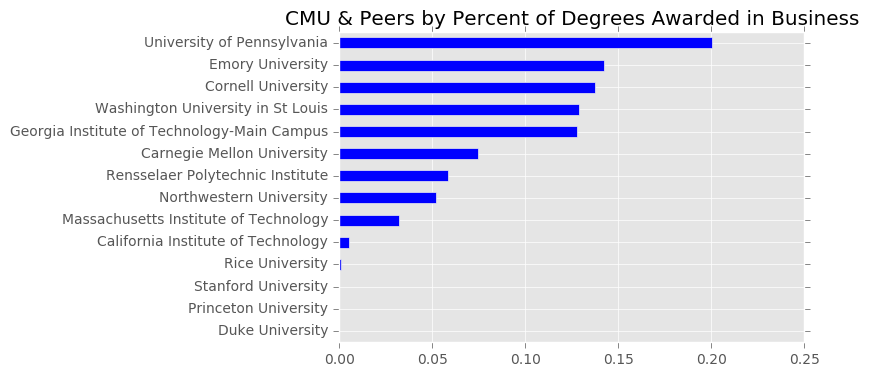

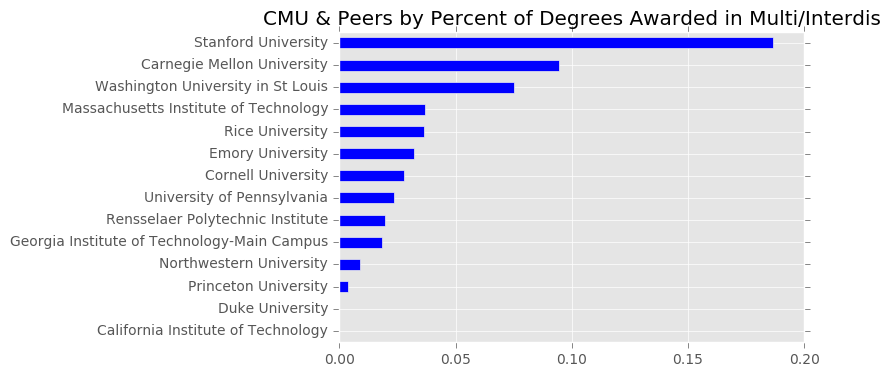

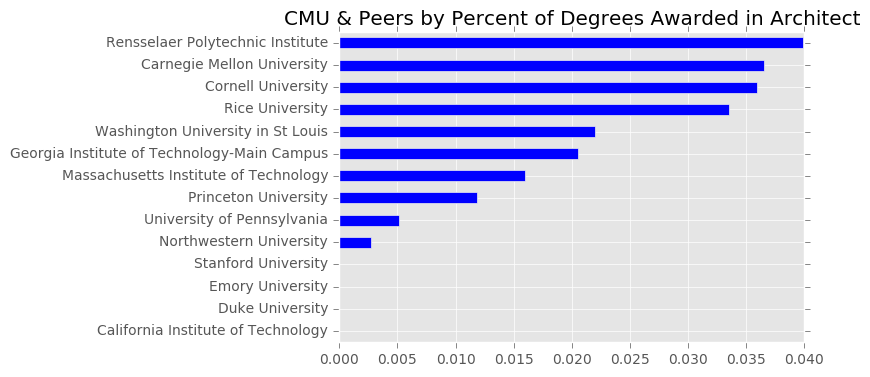

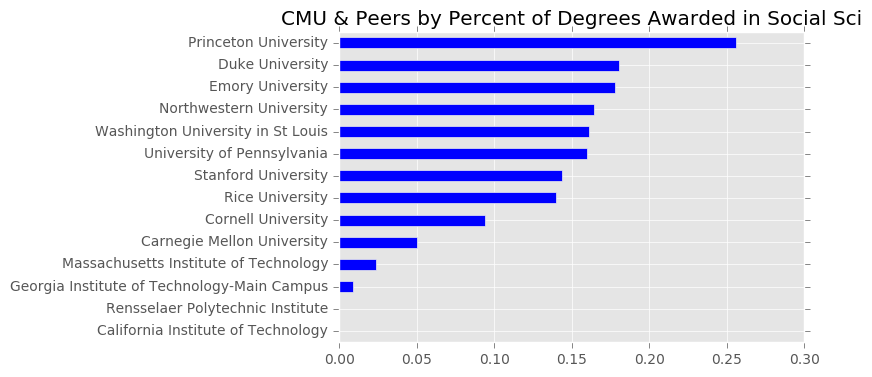

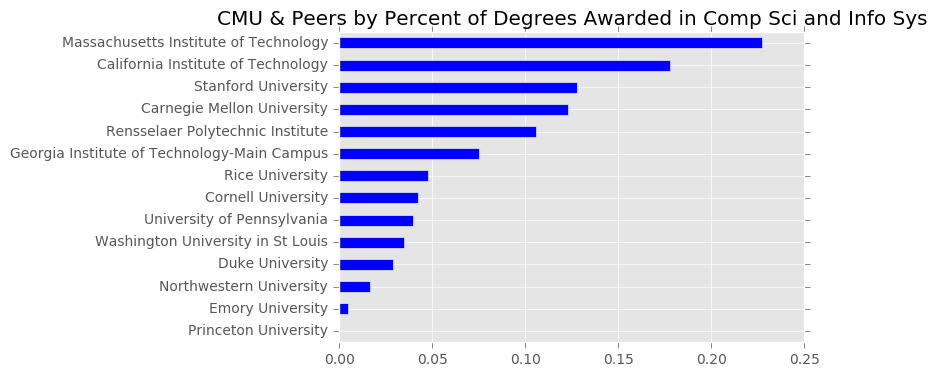

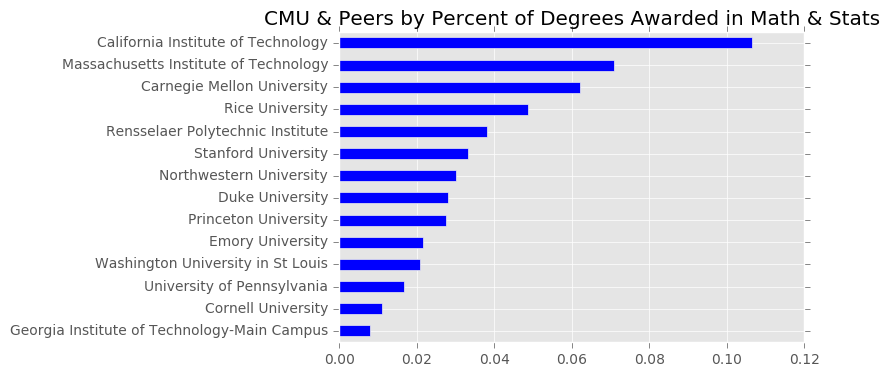

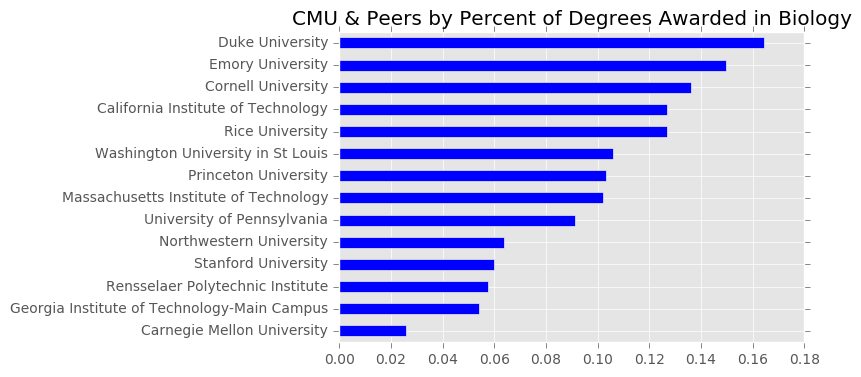

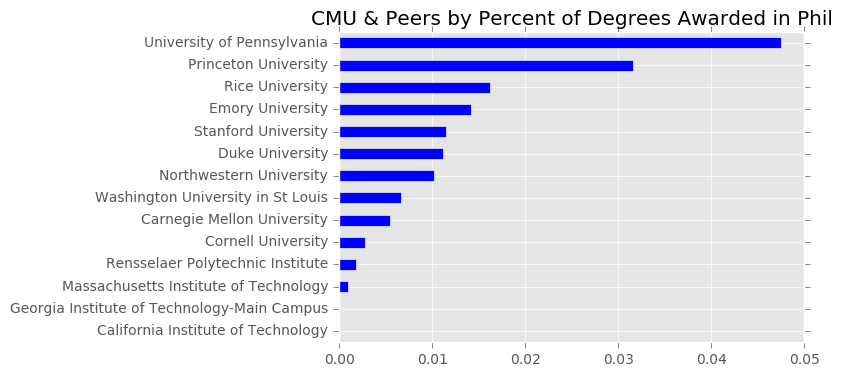

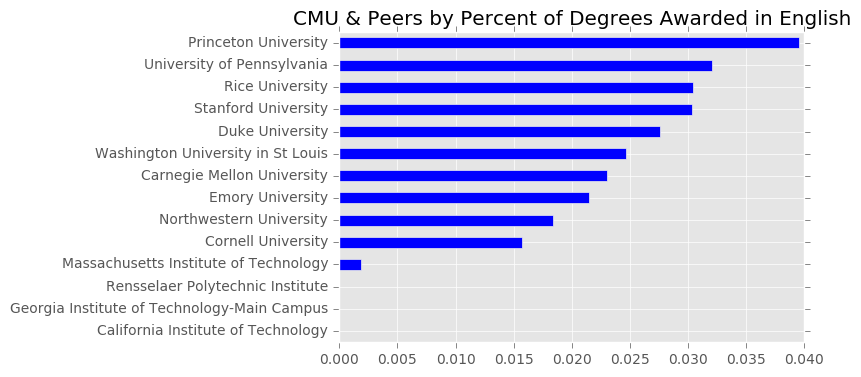

In [13]:
for subject in subjectCodes:
    subjectPopularity(peers,subject,subjectCodes)

Add a column for proportion of students studying a STEM discipline by summming STEM Columns

In [14]:
df['STEM'] = df[['PCIP11','PCIP14','PCIP15','PCIP26','PCIP27','PCIP29','PCIP40']].sum(axis=1) 

df.loc['Carnegie Mellon University','STEM']

0.54199999999999993

In [15]:
#df.to_csv('dfSTEM.csv') # creates a new csv including the STEM column, which we further analyzed in Tableau

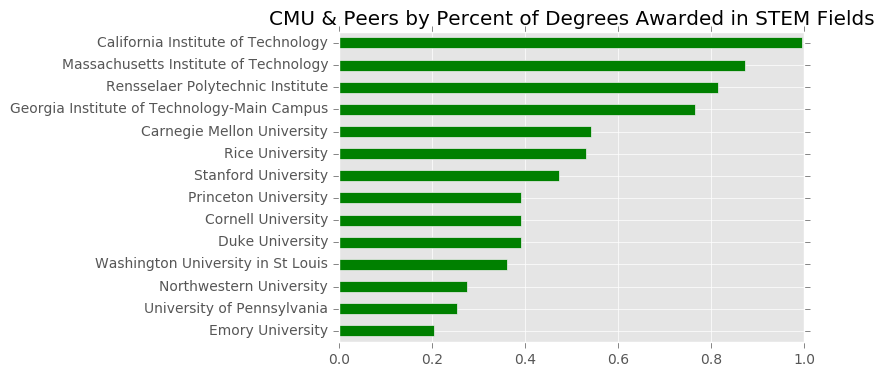

In [16]:

stemPeers = {}
for school in peers:
    stemPeers[school]=df.loc[school,"STEM"]
ser = pd.Series(stemPeers)
ser = ser.sort_values(ascending=True)
plt.style.use('ggplot')
ser.plot(kind='barh',color='green')
plt.title('CMU & Peers by Percent of Degrees Awarded in STEM Fields')

plt.show()

Below function displays a bargraph of a list of schools (defaulted to CMU & Peer Institutions) and any quantitiative variable (defaulted to Average SAT Score)

In [17]:
def barGraph(df,schools=peers,var="SAT_AVG",title=''):
    dict1 = {}
    for school in schools:
        dict1[school]=float(df.loc[school,var])
    ser = pd.Series(dict1)
    ser = ser.sort_values(ascending=True)
    plt.style.use('ggplot')
    ser.plot(kind='barh')
    if title == '': plt.title('CMU & Peers by ' + var)
    else: plt.title(title)
    return plt.show()

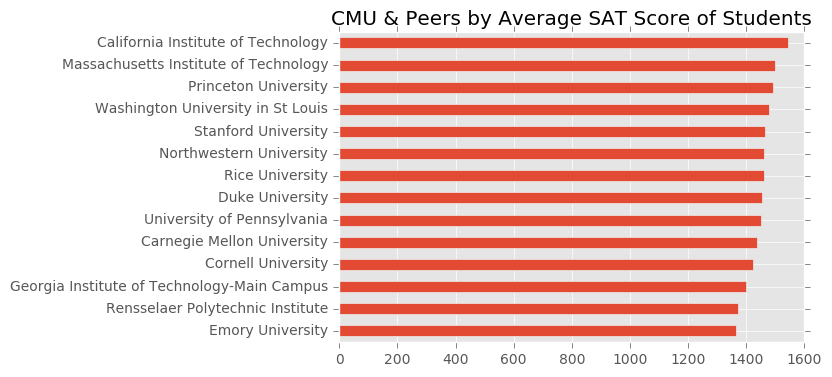

In [18]:
barGraph(df,title="CMU & Peers by Average SAT Score of Students")

CMU's avg test scores might be pulled down because of higher proportion of fine arts students (for whom SAT score is less relevant) than at peer institutions - question for future study - > compare Average SAT scores of non-fine arts students at CMU & Peer institutions

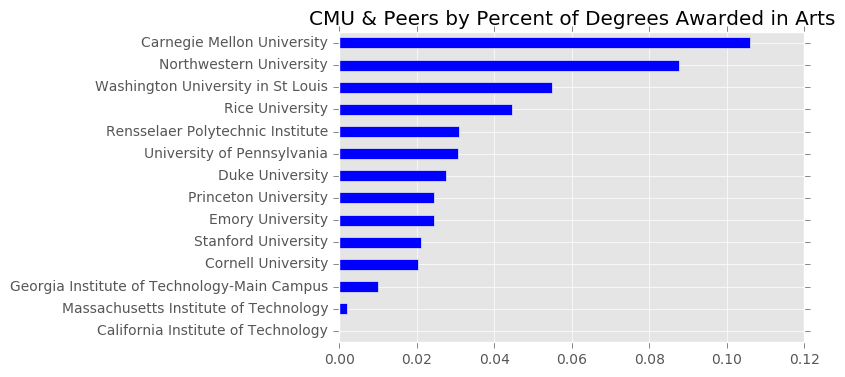

In [19]:
subjectPopularity(peers,"Arts",subjectCodes)

Relationship between average SAT and median earnings at a college/university

Where should you go to college if you want to make lots of money in the future? (assumption: the internal validity, the degree to which we can infer a causal relationship between school and future earnings, is strong - we could only validate assumption using a controlled experiment, which is difficult in this domain b/c colleges wouldn't agree to researchers randomly assigning students to go to various colleges)

In [20]:
def floatSpecial(s):
    if s == "PrivacySuppressed":
        return None
    else:
        return float(s)

In [21]:
df['MDClean'] = df['MD_EARN_WNE_P10'].apply(floatSpecial)

Filter dataset to only include colleges which have values for average SAT

In [22]:
df_filter = df['SAT_AVG'] > 0
df2 = df[df_filter]
df2.head()

,﻿UNITID,OPEID,OPEID6,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,CONTROL,...,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,STEM,MDClean
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,100654,100200,1002,Normal,AL,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,0,3,1,...,0.1049,30300,0.426,33888,347.789507913825,0.2370456303,NaN,0.32451962616822,0.2966,30300.0
University of Alabama at Birmingham,100663,105200,1052,Birmingham,AL,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,0,3,1,...,0.2422,39700,0.665,21941.5,225.183648722001,0.5006735519,NaN,0.54610480182926,0.1779,39700.0
University of Alabama in Huntsville,100706,105500,1055,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,1,...,0.2640,45500,0.668,24097,247.305352106924,0.5278022948,NaN,0.47240649606299,0.4146,45500.0
Alabama State University,100724,100500,1005,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,1,...,0.1270,26600,0.36,33118.5,339.892198354698,0.1855174624,NaN,0.2574049608355,0.2193,26600.0
The University of Alabama,100751,105100,1051,Tuscaloosa,AL,www.ua.edu/,financialaid.ua.edu/net-price-calculator/,0,3,1,...,0.0853,41900,0.67,23750,243.744122195271,0.5726116534,NaN,0.66125080978088,0.1335,41900.0


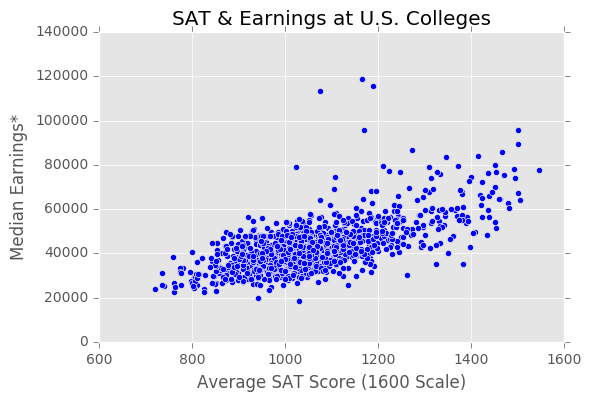

'\nggplot(df2, aes(x=\'SAT_AVG\',y=\'MDClean\')) +     ggtitle("Relationship between SAT & Earnings 10 years After Entry") +     ylab("Median Earnings 10 Years after entry") +     xlab("Average SAT Score") +     geom_point()\n'

In [23]:
# If ggplot is not installed, you can uncomment the following two lines and use matplotlib instead

plt.scatter(df2['SAT_AVG'],df2['MDClean'])
plt.style.use("ggplot")
plt.title("SAT & Earnings at U.S. Colleges")
plt.xlabel("Average SAT Score (1600 Scale)")
plt.ylabel("Median Earnings*")
plt.show()

# Add Caption - *Median earnings of students working and not enrolled 10 years after entry
# Mention in article - using the most recent data available
"""
ggplot(df2, aes(x='SAT_AVG',y='MDClean')) + \
    ggtitle("Relationship between SAT & Earnings 10 years After Entry") + \
    ylab("Median Earnings 10 Years after entry") + \
    xlab("Average SAT Score") + \
    geom_point()
"""

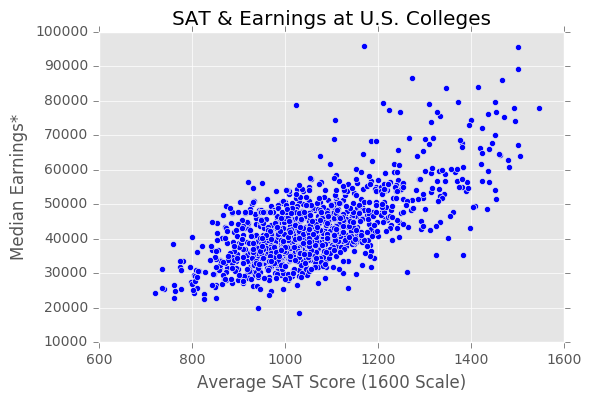

In [24]:
df3 = df2[df2['MDClean']<100000]


plt.scatter(df3['SAT_AVG'],df3['MDClean'])
plt.style.use("ggplot")
plt.title("SAT & Earnings at U.S. Colleges")
plt.xlabel("Average SAT Score (1600 Scale)")
plt.ylabel("Median Earnings*")
plt.show()

What are those outliers with high earnings, but mid-level SAT scores?

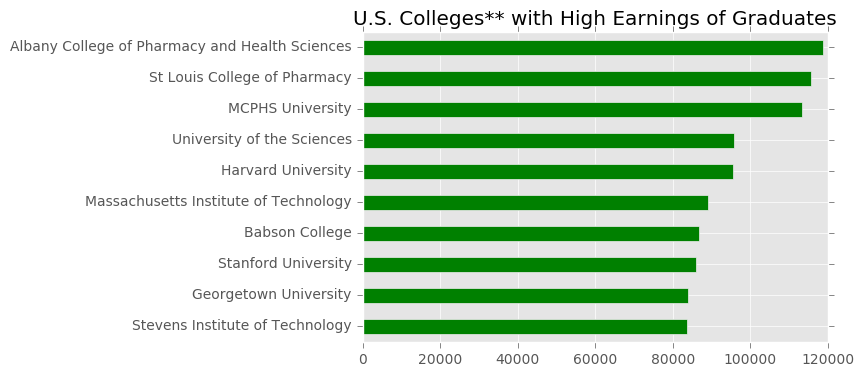

In [25]:
highEarningSchools = df2['MDClean'].nlargest(10)
highEarningSchools.sort_values(inplace=True)
highEarningSchools.plot(kind='barh',title='U.S. Colleges** with High Earnings of Graduates',color='green')
plt.ylabel("")
plt.show()

The outliers are pharmacy schools!

Exploring relationship between percent of students receiving pell grants and income of graduates:

Assumption - pell grants are a good proxy measure of percent of students in poverty

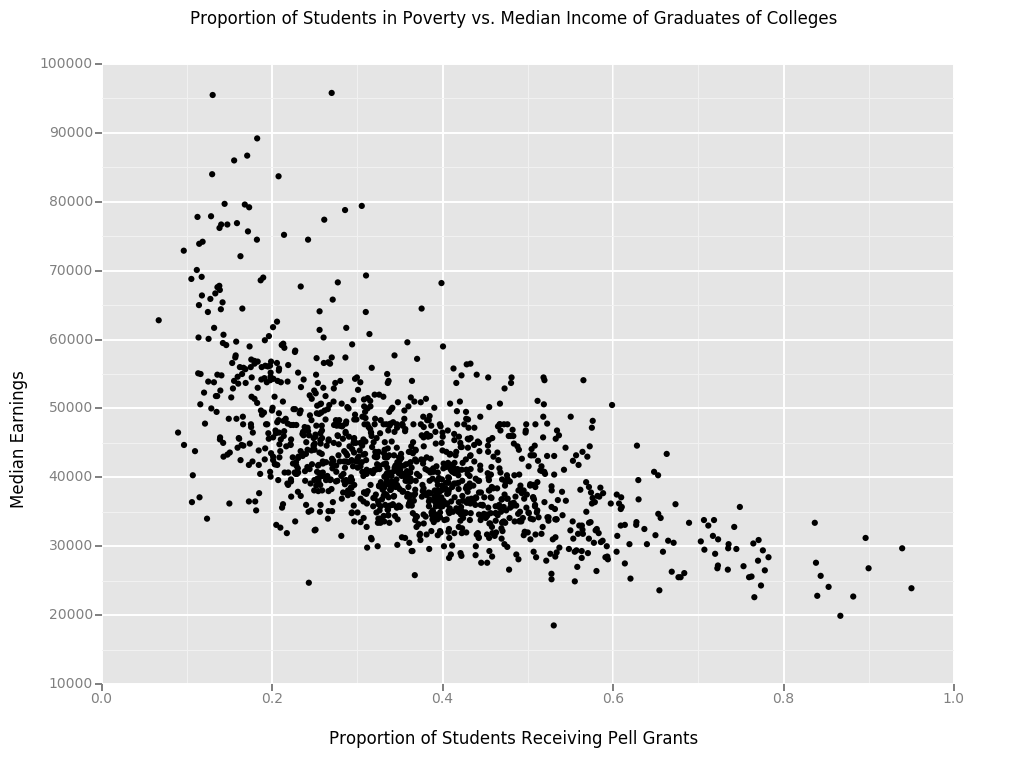

<ggplot: (7537955262)>

In [26]:
ggplot(df3, aes(x="PCTPELL",y='MDClean')) + \
    ggtitle("Proportion of Students in Poverty vs. Median Income of Graduates of Colleges") + \
    ylab("Median Earnings") + \
    xlab("Proportion of Students Receiving Pell Grants") + \
    geom_point()

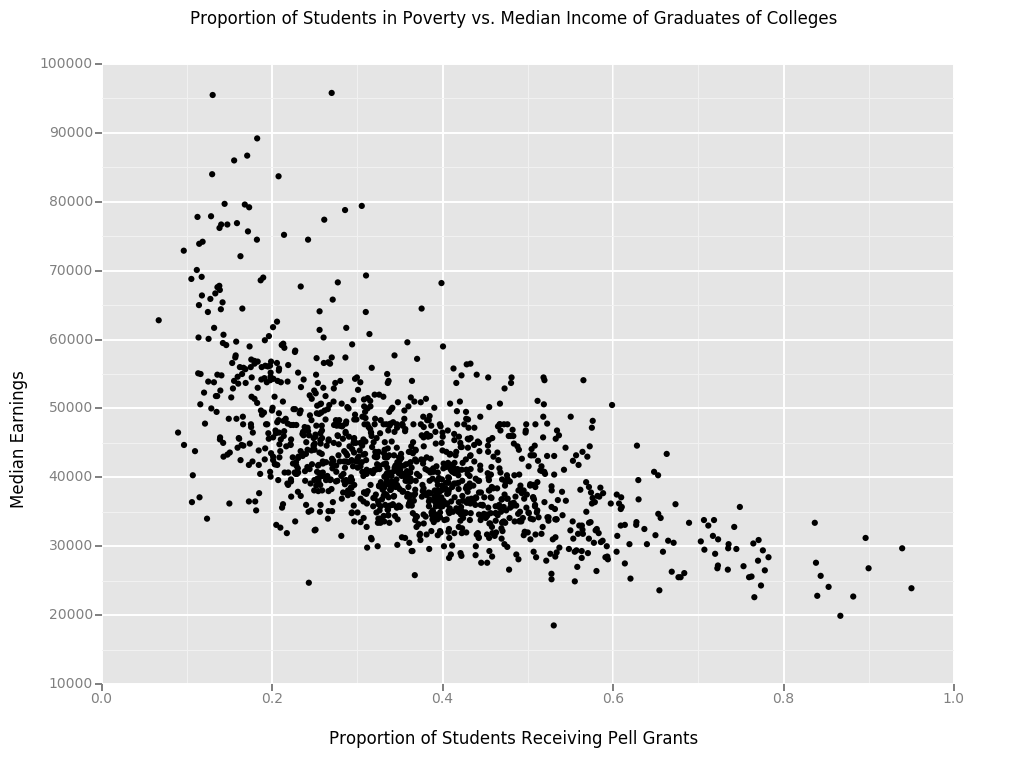

<ggplot: (-9223372029317922409)>

In [27]:
ggplot(df3, aes(x="PCTPELL",y='MDClean')) + \
    ggtitle("Proportion of Students in Poverty vs. Median Income of Graduates of Colleges") + \
    ylab("Median Earnings") + \
    xlab("Proportion of Students Receiving Pell Grants") + \
    geom_point()

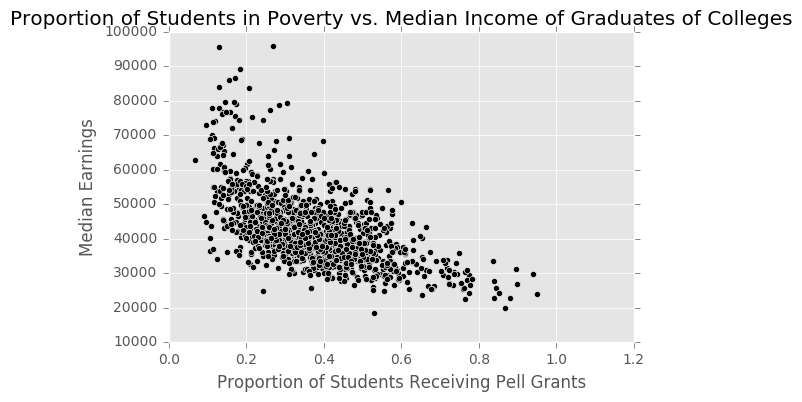

In [28]:
df3.plot(kind='scatter',x='PCTPELL',y='MDClean',color='black')
plt.title("Proportion of Students in Poverty vs. Median Income of Graduates of Colleges")
plt.ylabel("Median Earnings")
plt.xlabel("Proportion of Students Receiving Pell Grants")
plt.show()

In [29]:
df['MDClean'].nlargest(10)

INSTNM
Medical College of Wisconsin                                    233100.0
West Virginia School of Osteopathic Medicine                    219900.0
A T Still University of Health Sciences                         219800.0
Albany Medical College                                          214400.0
University of Massachusetts Medical School Worcester            213600.0
Louisiana State University Health Sciences Center-Shreveport    186500.0
Philadelphia College of Osteopathic Medicine                    167400.0
Baylor College of Medicine                                      163900.0
University of North Texas Health Science Center                 163100.0
Icahn School of Medicine at Mount Sinai                         150900.0
Name: MDClean, dtype: float64

Remove outliers

In [30]:
df['MDClean'].sort_values(ascending=False)

INSTNM
Medical College of Wisconsin                                    233100.0
West Virginia School of Osteopathic Medicine                    219900.0
A T Still University of Health Sciences                         219800.0
Albany Medical College                                          214400.0
University of Massachusetts Medical School Worcester            213600.0
Louisiana State University Health Sciences Center-Shreveport    186500.0
Philadelphia College of Osteopathic Medicine                    167400.0
Baylor College of Medicine                                      163900.0
University of North Texas Health Science Center                 163100.0
Eastern Virginia Medical School                                 150900.0
Icahn School of Medicine at Mount Sinai                         150900.0
Rosalind Franklin University of Medicine and Science            137500.0
Meharry Medical College                                         135100.0
Western University of Health Sciences       

In [31]:
df4 = df[df['MDClean']<110000]

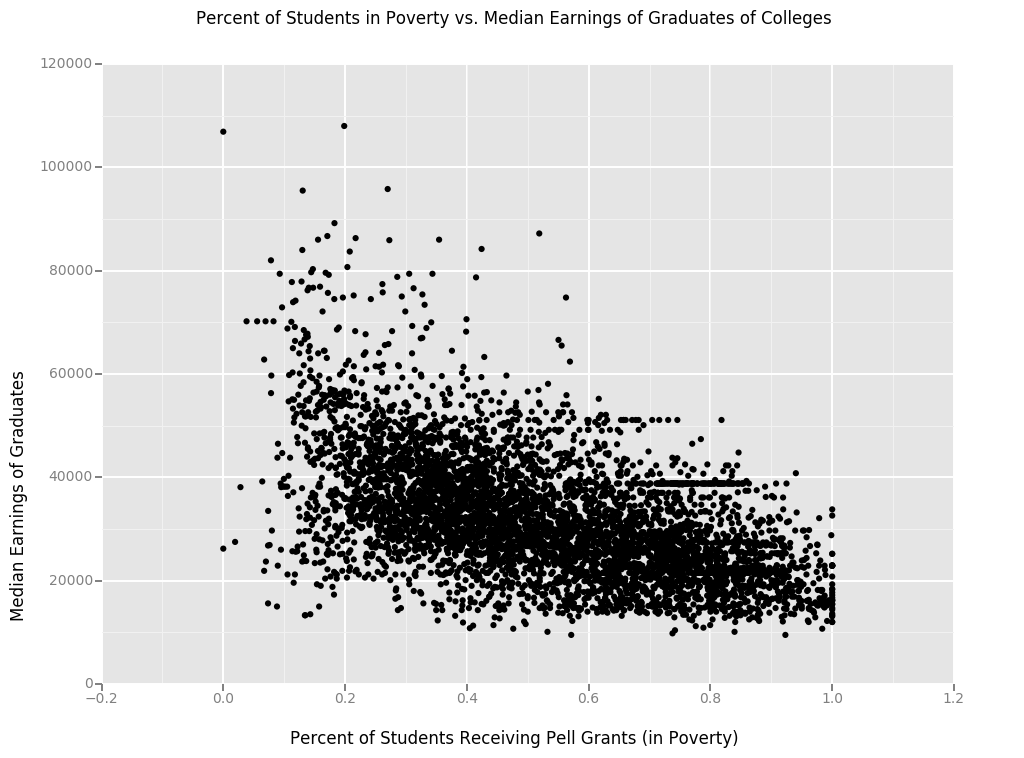

<ggplot: (7538936303)>

In [32]:
ggplot(df4, aes(x="PCTPELL",y='MDClean')) + \
    ggtitle("Percent of Students in Poverty vs. Median Earnings of Graduates of Colleges") + \
    ylab("Median Earnings of Graduates") + \
    xlab("Percent of Students Receiving Pell Grants (in Poverty)") + \
    geom_point()

This graph has deep implications regarding ideas about equality of opportunity, and higher education as an equalizer - it shows that low-income students tend to go to colleges where graduates do not earn as much as graduates of colleges where high-income students attend